In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path="/srv/chawak/planning-with-llms/results/Vanilla_Prompting_new/"
df= pd.read_csv(f'{path}score_metrics.csv')
df=df.drop(columns=['Unnamed: 0'])

In [ ]:
# Convert to flat format for plotting
labels_VP = df.columns.tolist()
values_VP = df.iloc[0].tolist()
#values_VP.append(7)


# Assign custom colours per metric
colour_map = {
    'reward/format_reward': '#1f77b4',   # blue
    'reward/plan_reward': '#ff7f0e',     # orange
    'reward/bonus_reward': '#2ca02c',    # green
    # 'terminate': '#9E9AC8'               # purple (or grey if you prefer)
}
bar_colors = [colour_map.get(label, '#333333') for label in labels_VP]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels_VP, values_VP, color=bar_colors, width=0.5)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

# Labels and styling
plt.ylabel('Value')
plt.title('Reward metrics for 3 block validation data w Vanilla Prompting')
# plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



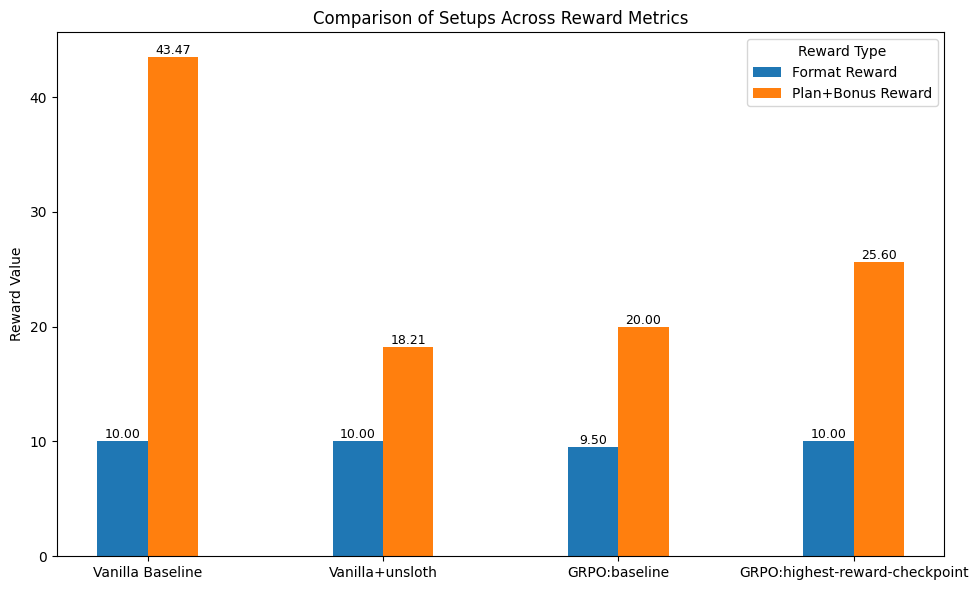

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Setups and categories
setups = ['Vanilla Baseline', 'Vanilla+unsloth', 'GRPO:baseline', 'GRPO:highest-reward-checkpoint']
categories = ['Format Reward', 'Plan+Bonus Reward']

# Dummy values (rows: setups, columns: categories)
values = np.array([
    [10.00,43.47],  # Baseline
    [10.00,18.21], #Baseline + unsloth
    [9.5, 20],  # Ours-A
    [10, 25.6]   # Ours-B
])

# Parameters
n_setups = len(setups)
n_categories = len(categories)
bar_width = 0.3
group_spacing = 0.8  # spacing between groups

# Compute x positions manually
x = np.arange(n_setups) * (n_categories * bar_width + group_spacing)
x_format = x
x_plan_bonus = x + bar_width

plt.figure(figsize=(10, 6))

# Plot bars
bars1 = plt.bar(x_format, values[:, 0], width=bar_width, label='Format Reward', color='#1f77b4')
bars2 = plt.bar(x_plan_bonus, values[:, 1], width=bar_width, label='Plan+Bonus Reward', color='#ff7f0e')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}',
                 ha='center', va='bottom', fontsize=9)

# Custom x-axis ticks (centered between the two bars per setup)
x_ticks = x + bar_width / 2
plt.xticks(x_ticks, setups)
plt.ylabel('Reward Value')
plt.title('Comparison of Setups Across Reward Metrics')
plt.legend(title='Reward Type', fontsize=10)
plt.tight_layout()
plt.show()
